In [1]:
import pandas as pd

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\HP\\ML'

In [4]:
housing_data = pd.read_csv("C:\\Users\\HP\\ML\\housing.csv")

In [5]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
import matplotlib.pyplot as plt

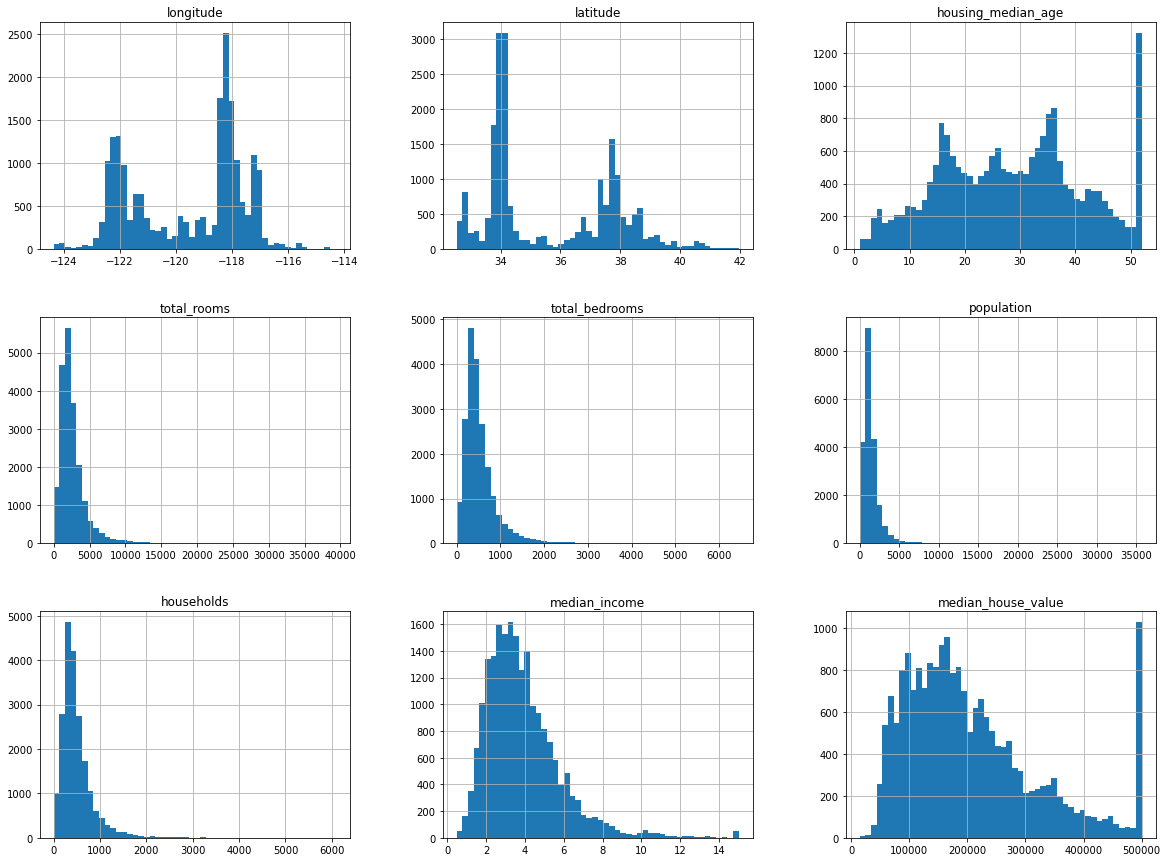

In [10]:
housing_data.hist(bins=50,figsize=(20,15))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing_data,test_size=0.2,random_state= 42)

In [12]:
import numpy as np

In [13]:
housing_data["income_cat"] = np.ceil(housing_data["median_income"]/1.5)
housing_data["income_cat"].where(housing_data["income_cat"] <5,5.0, inplace = True)

<AxesSubplot:>

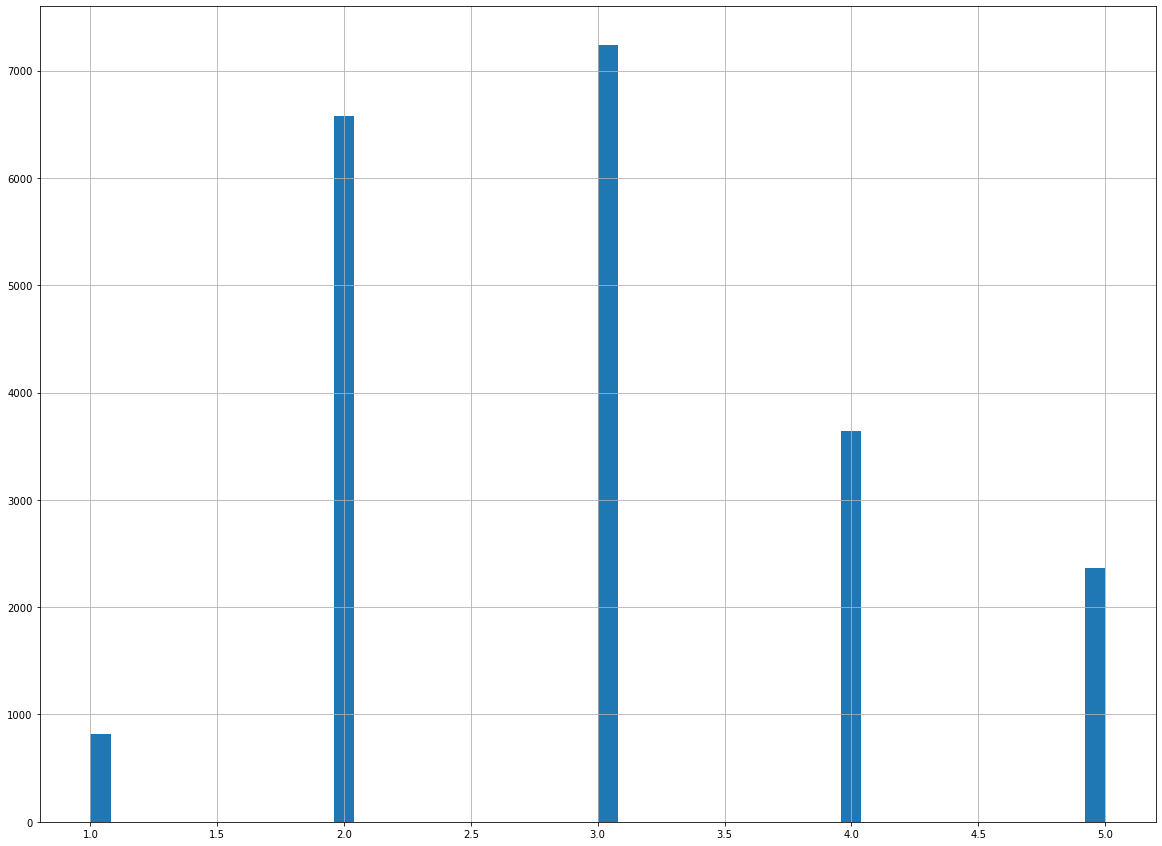

In [14]:
housing_data["income_cat"].hist(bins= 50 ,figsize = (20,15))

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing_data,housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [17]:
for set_ in (strat_test_set,strat_train_set):
    set_.drop("income_cat",axis=1,inplace= True)
    

In [18]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

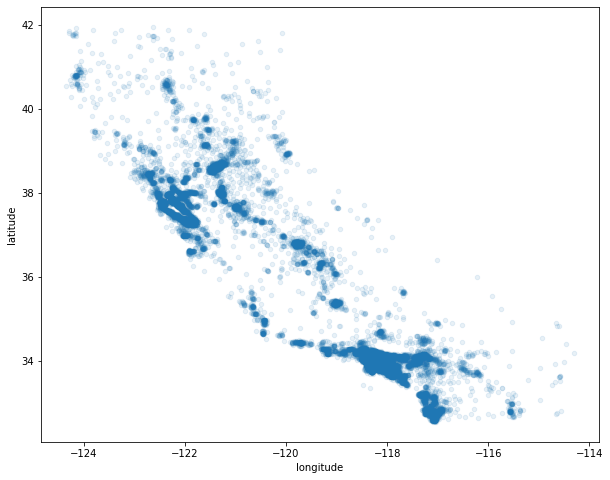

In [19]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha =0.1,figsize =(10,8))

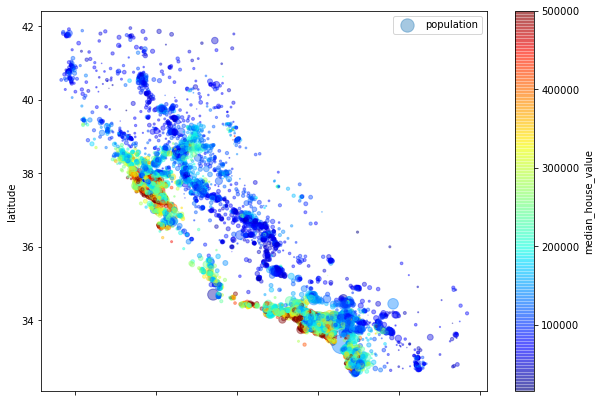

In [20]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
            s=housing["population"]/100,label="population",figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

In [21]:
corr_matrix = housing.corr()

In [22]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

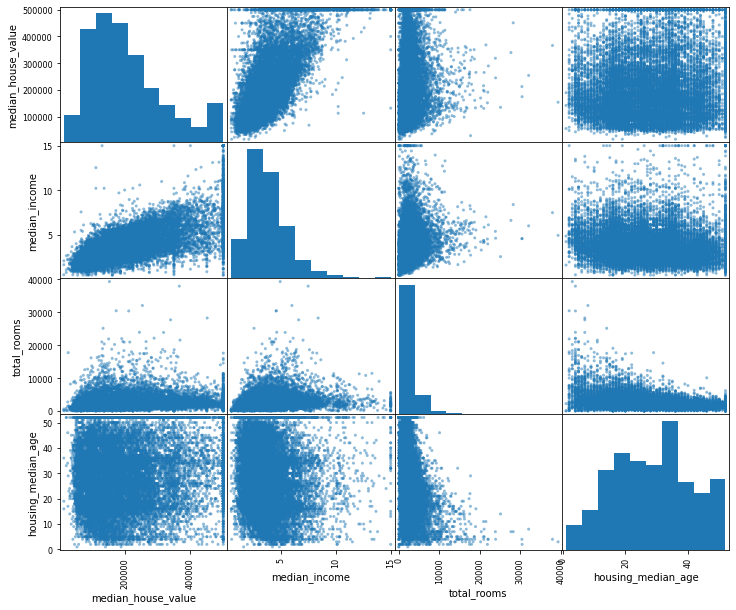

In [23]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
pd.plotting.scatter_matrix(housing[attributes],figsize=(12,10))

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

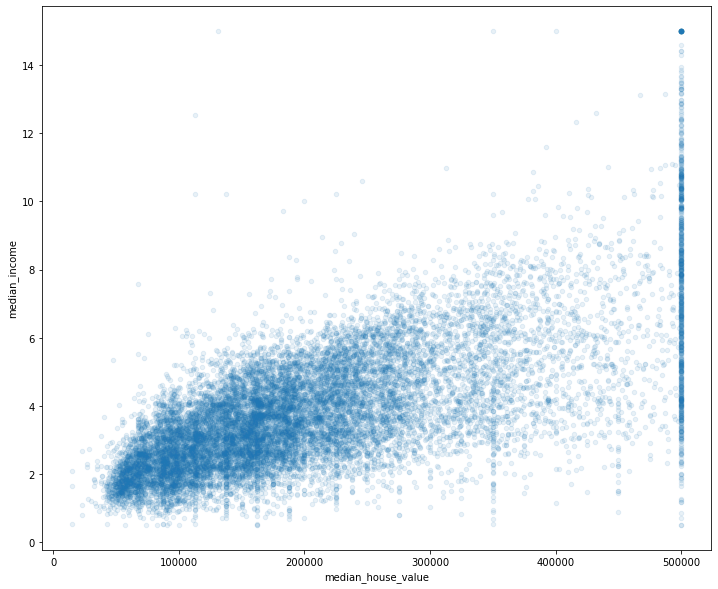

In [25]:
housing.plot(kind="scatter",x="median_house_value",y="median_income",alpha=0.1,figsize= (12,10))

In [28]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["population_per_household"]=housing["population"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]

In [29]:
corr_matrix = housing.corr()

In [30]:
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [31]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_label = strat_train_set["median_house_value"].copy()

In [32]:
housing_num = housing.drop("ocean_proximity",axis =1)

In [33]:
from sklearn.impute import SimpleImputer

In [37]:
imputer = SimpleImputer(strategy="median")

In [38]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [40]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [41]:
X= imputer.transform(housing_num)

In [42]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [44]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [45]:
housing_cat = housing["ocean_proximity"]

In [46]:
housing_cat

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
            ...    
6563         INLAND
12053        INLAND
13908        INLAND
11159     <1H OCEAN
15775      NEAR BAY
Name: ocean_proximity, Length: 16512, dtype: object

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
cat_encoder = OneHotEncoder()

In [52]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat.values.reshape(-1,1))

In [53]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [54]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [56]:
from sklearn.base import BaseEstimator,TransformerMixin

In [59]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [80]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]



In [81]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
###In this example the transformer has one hyperparameter,
# add_bedrooms_per_room, set to True by default (it is often helpful to provide sensible defaults). 
# This hyperparameter will allow you to easily find out whether adding this attribute helps
# the Machine Learning algorithms or not. More generally, you can add a hyperparameter to gate any
# data preparation step that you are not 100% sure about. The more you automate these data preparation steps,
# the more combinations you can automatically try out, making it much more likely that you will find a great
# combination (and saving you a lot of time).     

In [82]:
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [104]:
num_pipeline = Pipeline([("imputer",SimpleImputer(strategy="median")),("attribute_adder",CombinedAttributesAdder()),("standard_scaler",StandardScaler()),])

In [105]:
from sklearn.compose import ColumnTransformer

In [106]:
num_attrib = list(housing_num)
cat_attrib = ["ocean_proximity"]
full_pipeline = ColumnTransformer([("num",num_pipeline,num_attrib),("cat",OneHotEncoder(),cat_attrib),])

In [107]:
housing_prepared = full_pipeline.fit_transform(housing)

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
lin_reg = LinearRegression()

In [110]:
lin_reg.fit(housing_prepared,housing_label)

LinearRegression()

In [111]:
#to test taking some data from train set as new instance
some_data = housing.iloc[:5]
some_label = housing_label.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)


In [99]:
some_data_prepared


array([[-1.10455841,  1.00533684,  1.47196014, -0.46113268, -0.4331532 ,
        -0.58007617, -0.43824234, -0.43110712, -0.46223461, -0.92151953,
         0.42880968,  1.        ,  0.        ,  0.        ],
       [-1.12615291,  0.86824545, -1.24550474, -0.88833875, -0.92454549,
        -0.85125272, -0.91670982,  1.93576051,  1.7120418 , -0.1229502 ,
        -1.78149012,  1.        ,  0.        ,  0.        ],
       [ 1.42739611, -1.57655096,  0.67936622, -0.27660272, -0.19049034,
        -0.4283784 , -0.17783747, -0.33056682, -1.09128343, -1.01057078,
         1.02369397,  0.        ,  0.        ,  1.        ],
       [ 0.1263278 ,  0.44554701,  0.        , -0.32706013, -0.39270939,
        -0.07665436, -0.40860276, -0.95342003,  0.49160921,  1.73562899,
        -0.35529028,  0.        ,  1.        ,  0.        ],
       [ 0.67698742, -0.74257835, -0.90582163,  1.95313428,  1.94089843,
         1.93636166,  1.94139238, -0.22066654, -0.65013297,  0.31941151,
         0.68427675,  1.  

In [100]:
xyz = pd.DataFrame(some_data_prepared)

In [101]:
xyz

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.104558,1.005337,1.471960,-0.461133,-0.433153,-0.580076,-0.438242,-0.431107,-0.462235,-0.921520,0.428810,1.0,0.0,0.0
1,-1.126153,0.868245,-1.245505,-0.888339,-0.924545,-0.851253,-0.916710,1.935761,1.712042,-0.122950,-1.781490,1.0,0.0,0.0
2,1.427396,-1.576551,0.679366,-0.276603,-0.190490,-0.428378,-0.177837,-0.330567,-1.091283,-1.010571,1.023694,0.0,0.0,1.0
3,0.126328,0.445547,0.000000,-0.327060,-0.392709,-0.076654,-0.408603,-0.953420,0.491609,1.735629,-0.355290,0.0,1.0,0.0
4,0.676987,-0.742578,-0.905822,1.953134,1.940898,1.936362,1.941392,-0.220667,-0.650133,0.319412,0.684277,1.0,0.0,0.0


In [112]:
lin_reg.predict(some_data_prepared)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

In [113]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [114]:
#predictions are not really good so lets predict on entire training set
housing_pred_data = full_pipeline.transform(housing)


In [115]:
housing_prediction = lin_reg.predict(housing_pred_data)

In [116]:
housing_prediction

array([210644.60459286, 317768.80697211, 210956.43331178, ...,
        95464.57062437, 214353.22541713, 276426.4692067 ])

In [117]:
# lets measure RMSE
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(housing_prediction,housing_label)

In [118]:
lin_rmse = np.sqrt(lin_mse)

In [119]:
lin_rmse

68628.19819848922

In [120]:
#median_housing_values range between $120,000 and $265,000, 
# so a typical prediction error of $68,628 is not very satisfying. 
# This is an example of a model underfitting the training data
# the main ways to fix underfitting are to select a more powerful model,
# to feed the training algorithm with better features, or to reduce the constraints on the model.
# This model is not regularized, so this rules out the last option. You could try to add more features 
# (e.g., the log of the population), but first let’s try a more complex model to see how it does.


In [124]:
from sklearn.tree import DecisionTreeRegressor

In [125]:
tree_reg = DecisionTreeRegressor()

In [126]:
tree_reg.fit(housing_prepared,housing_label)

DecisionTreeRegressor()

In [138]:
#now predict on train set itself
housing_prediction=tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_prediction,housing_label)

In [139]:
tree_rmse = np.sqrt(tree_mse)

In [140]:
tree_rmse

0.0

In [144]:
# model must be overfitting so we are using cross_validation technique
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_label,cv=10,scoring="neg_mean_squared_error")

In [145]:
tree_rmse = np.sqrt(-scores)

In [146]:
tree_rmse

array([69659.63357409, 66972.59162959, 70191.46242161, 69584.17458498,
       69694.80209058, 74528.88615587, 70249.00999479, 71485.80627827,
       74231.58702151, 69295.63259039])

In [147]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())



In [149]:
display_scores(tree_rmse)

Scores: [69659.63357409 66972.59162959 70191.46242161 69584.17458498
 69694.80209058 74528.88615587 70249.00999479 71485.80627827
 74231.58702151 69295.63259039]
Mean: 70589.35863416806
Standard deviation: 2174.700609331722


In [150]:
# Now the Decision Tree doesn’t look as good as it did earlier. 
# In fact, it seems to perform worse than the Linear Regression model
lin_reg_score = cross_val_score(lin_reg,housing_prepared,housing_label,cv= 10,scoring="neg_mean_squared_error")

In [151]:
lin_rmse =np.sqrt(-lin_reg_score)

In [152]:
lin_rmse

array([66782.73843989, 66960.118071  , 70347.95244419, 74739.57052552,
       68024.01273425, 71193.84183426, 64969.63056405, 68281.61137997,
       71552.91566558, 67665.10082067])

In [153]:
display_scores(lin_rmse)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68024.01273425 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69051.74924793819
Standard deviation: 2731.941072269529


In [154]:
# That’s right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

In [155]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor()

In [156]:
random_reg.fit(housing_prepared,housing_label)

RandomForestRegressor()

In [159]:
random_score = cross_val_score(random_reg,housing_prepared,housing_label,cv=10,scoring="neg_mean_squared_error")


In [160]:
random_rmse = np.sqrt(-random_score)

In [161]:
random_rmse

array([49454.39946309, 47509.18838458, 49766.27677534, 52125.01245829,
       49577.34616146, 53916.84026376, 48988.93487105, 47697.45278331,
       53099.99058465, 49980.53928704])

In [163]:
display_scores(random_rmse)

Scores: [49454.39946309 47509.18838458 49766.27677534 52125.01245829
 49577.34616146 53916.84026376 48988.93487105 47697.45278331
 53099.99058465 49980.53928704]
Mean: 50211.59810325921
Standard deviation: 2051.315675692592


In [164]:
from sklearn.model_selection import GridSearchCV

In [165]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
forest_reg = RandomForestRegressor()

In [166]:
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)

In [167]:
grid_search.fit(housing_prepared,housing_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [168]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [169]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [171]:
cv_result=grid_search.cv_results_
for mean,param in zip(cv_result["mean_test_score"],cv_result["params"]):
    print(np.sqrt(-mean),param)

63874.16284254386 {'max_features': 2, 'n_estimators': 3}
55502.204052718116 {'max_features': 2, 'n_estimators': 10}
53079.293785496295 {'max_features': 2, 'n_estimators': 30}
60164.250903388434 {'max_features': 4, 'n_estimators': 3}
52678.62252306506 {'max_features': 4, 'n_estimators': 10}
50498.894899706174 {'max_features': 4, 'n_estimators': 30}
58870.95629352861 {'max_features': 6, 'n_estimators': 3}
52033.736078455804 {'max_features': 6, 'n_estimators': 10}
50083.50493872119 {'max_features': 6, 'n_estimators': 30}
59695.50187677729 {'max_features': 8, 'n_estimators': 3}
52002.99986657559 {'max_features': 8, 'n_estimators': 10}
49921.650243489195 {'max_features': 8, 'n_estimators': 30}
62580.65623472317 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54475.689341973375 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60025.15879543895 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52691.13846814984 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [173]:
# Another way to fine-tune your system is to try to combine the models that perform best. 
# The group (or “ensemble”) will often perform better than the best individual model
# (just like Random Forests perform better than the individual Decision Trees they rely on)
# ForestRegressor can indicate the relative importance of each attribute for making accurate predictions:
feature_importance = grid_search.best_estimator_.feature_importances_


In [174]:
feature_importance

array([6.92913251e-02, 6.43047949e-02, 4.51367006e-02, 1.49575384e-02,
       1.48071801e-02, 1.59424224e-02, 1.40692158e-02, 3.57218703e-01,
       5.60875653e-02, 1.09844715e-01, 7.18122288e-02, 3.72949639e-03,
       1.57314518e-01, 8.56256341e-05, 2.09526376e-03, 3.30270732e-03])

In [176]:
# Let’s display these importance scores next to their corresponding attribute names:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
# here we are first creating instanvce using fullpipeline by just using categorical encoder 
# and then getting its categories which are dummy added features

In [178]:
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [179]:
num_attrib

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [180]:
extra_attrib = ['rooms_per_house','ppopulation_per_house','bedroom_per_room']

In [185]:
attributes= num_attrib+extra_attrib+cat_one_hot_attribs
#should be in same order as feature_importance

In [186]:
sorted(zip(feature_importance,attributes),reverse= True)

[(0.35721870250907894, 'median_income'),
 (0.15731451804648489, 'INLAND'),
 (0.10984471474046555, 'ppopulation_per_house'),
 (0.07181222883084258, 'bedroom_per_room'),
 (0.06929132507274602, 'longitude'),
 (0.0643047949296622, 'latitude'),
 (0.0560875653471324, 'rooms_per_house'),
 (0.045136700627099485, 'housing_median_age'),
 (0.015942422434925125, 'population'),
 (0.014957538409083166, 'total_rooms'),
 (0.014807180117692933, 'total_bedrooms'),
 (0.014069215835084482, 'households'),
 (0.0037294963879161494, '<1H OCEAN'),
 (0.003302707318072851, 'NEAR OCEAN'),
 (0.002095263759592742, 'NEAR BAY'),
 (8.562563412053766e-05, 'ISLAND')]

In [187]:
#Evaluate Your System on the Test Set
#first here the final model will be the best model with best hyperparameters lets find that first
final_model = grid_search.best_estimator_

In [189]:
#seperate label from strated test set 
X_test = strat_test_set.drop("median_house_value",axis=1)
Y_test = strat_test_set["median_house_value"]

In [190]:
#now prepare Xtest as we prepare train test but here we just use transform
# we will never fit test data
X_test_prepared = full_pipeline.transform(X_test)

In [191]:
X_test_predict = final_model.predict(X_test_prepared)

In [192]:
X_test_mse = mean_squared_error(X_test_predict,Y_test)

In [194]:
X_test_rmse = np.sqrt(X_test_mse)

In [195]:
X_test_rmse

47913.41846091836